In [85]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_thres5max/dist_matched_chr/X_train_thres_10_chr.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max/dist_matched_chr/y_train_thres_10_chr.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max/dist_matched_chr/X_valid_thres_10_chr.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max/dist_matched_chr/y_valid_thres_10_chr.npy')
X_test = get_features('/users/mtaranov/NN_thres5max/dist_matched_chr/X_test_thres_10_chr.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max/dist_matched_chr/y_test_thres_10_chr.npy')

X_train_noDM = get_features('/users/mtaranov/NN_thres5max/no_dist_matched_chr/X_train_thres_10_chr_noDM.npy')
y_train_noDM = get_labels('/users/mtaranov/NN_thres5max/no_dist_matched_chr/y_train_thres_10_chr_noDM.npy')
X_valid_noDM = get_features('/users/mtaranov/NN_thres5max/no_dist_matched_chr/X_valid_thres_10_chr_noDM.npy')
y_valid_noDM = get_labels('/users/mtaranov/NN_thres5max/no_dist_matched_chr/y_valid_thres_10_chr_noDM.npy')
X_test_noDM = get_features('/users/mtaranov/NN_thres5max/no_dist_matched_chr/X_test_thres_10_chr_noDM.npy')
y_test_noDM = get_labels('/users/mtaranov/NN_thres5max/no_dist_matched_chr/y_test_thres_10_chr_noDM.npy')


"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [87]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)
X_train_normalized_noDM, X_valid_normalized_noDM, X_test_normalized_noDM = normalize_features(X_train_noDM, X_valid_noDM, X_test_noDM)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [89]:
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)

In [90]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)

Training model...
Train on 1694 samples, validate on 392 samples
Epoch 1/100
1694/1694 [==============================] - 0s - loss: 1.3860 - val_loss: 0.6938
Epoch 0: validation loss: 0.694
Balanced Accuracy: 54.59%	 auROC: 0.546	 auPRC: 0.596	 auPRG: -0.020
Recall at 5%|10%|20% FDR: 0.0%|0.0%|16.8%	 Num Positives: 196	 Num Negatives: 196	 

Epoch 2/100
1694/1694 [==============================] - 0s - loss: 1.3511 - val_loss: 0.6747
Epoch 1: validation loss: 0.675
Balanced Accuracy: 56.12%	 auROC: 0.607	 auPRC: 0.662	 auPRG: 0.131
Recall at 5%|10%|20% FDR: 6.6%|7.1%|28.1%	 Num Positives: 196	 Num Negatives: 196	 

Epoch 3/100
1694/1694 [==============================] - 0s - loss: 1.3256 - val_loss: 0.6558
Epoch 2: validation loss: 0.656
Balanced Accuracy: 58.93%	 auROC: 0.661	 auPRC: 0.704	 auPRG: 0.257
Recall at 5%|10%|20% FDR: 9.2%|11.2%|35.7%	 Num Positives: 196	 Num Negatives: 196	 

Epoch 4/100
1694/1694 [==============================] - 0s - loss: 1.3001 - val_loss: 0.6437
Ep

## preds on distance-matched

In [91]:
print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))

Balanced Accuracy: 64.04%	 auROC: 0.701	 auPRC: 0.707	 auPRG: 0.404
Recall at 5%|10%|20% FDR: 6.7%|15.7%|23.6%	 Num Positives: 89	 Num Negatives: 89	 


In [92]:
print(dnn_normalized.test(X_train_normalized[:, :, :10:, :], y_train))

Balanced Accuracy: 80.99%	 auROC: 0.888	 auPRC: 0.883	 auPRG: 0.820
Recall at 5%|10%|20% FDR: 7.1%|68.8%|81.6%	 Num Positives: 847	 Num Negatives: 847	 


In [93]:
print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))

Balanced Accuracy: 69.39%	 auROC: 0.755	 auPRC: 0.779	 auPRG: 0.518
Recall at 5%|10%|20% FDR: 3.1%|33.2%|54.1%	 Num Positives: 196	 Num Negatives: 196	 


In [94]:
pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

### preds on not distance-matched

In [95]:
print(dnn_normalized.test(X_test_normalized_noDM[:, :, :10, :], y_test_noDM))

Balanced Accuracy: 57.46%	 auROC: 0.596	 auPRC: 0.002	 auPRG: 0.279
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 221	 Num Negatives: 152062	 


In [96]:
print(dnn_normalized.test(X_train_normalized_noDM[:, :, :10, :], y_train_noDM))

Balanced Accuracy: 64.36%	 auROC: 0.699	 auPRC: 0.003	 auPRG: 0.544
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1156	 Num Negatives: 686628	 


In [97]:
print(dnn_normalized.test(X_valid_normalized_noDM[:, :, :10, :], y_valid_noDM))

Balanced Accuracy: 61.24%	 auROC: 0.659	 auPRC: 0.003	 auPRG: 0.865
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 288	 Num Negatives: 237639	 


In [98]:
pred_probs_test_noDM = dnn_normalized.predict(X_test_normalized_noDM[:, :, :10, :])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid_noDM = dnn_normalized.predict(X_valid_normalized_noDM[:, :, :10, :])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train_noDM = dnn_normalized.predict(X_train_normalized_noDM[:, :, :10, :])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

# with genomic locations

In [99]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)

In [100]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)

Training model...
Train on 1694 samples, validate on 392 samples
Epoch 1/100
1694/1694 [==============================] - 0s - loss: 1.4177 - val_loss: 0.6829
Epoch 0: validation loss: 0.683
Balanced Accuracy: 56.89%	 auROC: 0.604	 auPRC: 0.603	 auPRG: 0.219
Recall at 5%|10%|20% FDR: 3.6%|6.6%|6.6%	 Num Positives: 196	 Num Negatives: 196	 

Epoch 2/100
1694/1694 [==============================] - 0s - loss: 1.3562 - val_loss: 0.6619
Epoch 1: validation loss: 0.662
Balanced Accuracy: 65.31%	 auROC: 0.705	 auPRC: 0.687	 auPRG: 0.404
Recall at 5%|10%|20% FDR: 3.6%|6.6%|16.3%	 Num Positives: 196	 Num Negatives: 196	 

Epoch 3/100
1694/1694 [==============================] - 0s - loss: 1.3255 - val_loss: 0.6383
Epoch 2: validation loss: 0.638
Balanced Accuracy: 68.88%	 auROC: 0.750	 auPRC: 0.739	 auPRG: 0.505
Recall at 5%|10%|20% FDR: 8.2%|9.2%|28.1%	 Num Positives: 196	 Num Negatives: 196	 

Epoch 4/100
1694/1694 [==============================] - 0s - loss: 1.2811 - val_loss: 0.6117
Epoch

In [101]:
print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))

Balanced Accuracy: 71.91%	 auROC: 0.761	 auPRC: 0.795	 auPRG: 0.557
Recall at 5%|10%|20% FDR: 24.7%|24.7%|56.2%	 Num Positives: 89	 Num Negatives: 89	 


# with distance only

In [102]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)

In [104]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 1694 samples, validate on 392 samples
Epoch 1/100
1694/1694 [==============================] - 0s - loss: 1.2051 - val_loss: 0.5873
Epoch 0: validation loss: 0.587
Balanced Accuracy: 67.35%	 auROC: 0.752	 auPRC: 0.701	 auPRG: 0.499
Recall at 5%|10%|20% FDR: 0.0%|0.0%|10.7%	 Num Positives: 196	 Num Negatives: 196	 

Epoch 2/100
1694/1694 [==============================] - 0s - loss: 1.2038 - val_loss: 0.5854
Epoch 1: validation loss: 0.585
Balanced Accuracy: 67.86%	 auROC: 0.762	 auPRC: 0.724	 auPRG: 0.535
Recall at 5%|10%|20% FDR: 2.0%|2.0%|11.2%	 Num Positives: 196	 Num Negatives: 196	 

Epoch 3/100
1694/1694 [==============================] - 0s - loss: 1.2049 - val_loss: 0.5873
Epoch 2: validation loss: 0.587
Balanced Accuracy: 67.35%	 auROC: 0.756	 auPRC: 0.717	 auPRG: 0.504
Recall at 5%|10%|20% FDR: 1.0%|1.0%|11.2%	 Num Positives: 196	 Num Negatives: 196	 

Epoch 4/100
1694/1694 [==============================] - 0s - loss: 1.2040 - val_loss: 0.5888
Epoc

In [105]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))

Balanced Accuracy: 70.22%	 auROC: 0.765	 auPRC: 0.677	 auPRG: 0.547
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 89	 Num Negatives: 89	 


# Print prediction

In [106]:
# indx_test=np.load('/users/mtaranov/NN_all_data/indx_test_upperTriangle_noDiag.npy')
# indx_valid=np.load('/users/mtaranov/NN_all_data/indx_vali_upperTriangle_noDiag.npy')
# indx_train=np.load('/users/mtaranov/NN_all_data/indx_train_upperTriangle_noDiag.npy')

indx_train = np.load('/users/mtaranov/NN_thres5max/dist_matched_chr/indx_train_thres_10_chr.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max/dist_matched_chr/indx_valid_thres_10_chr.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max/dist_matched_chr/indx_test_thres_10_chr.npy')

indx_train_noDM = np.load('/users/mtaranov/NN_thres5max/no_dist_matched_chr/indx_train_thres_10_chr_noDM.npy')
indx_valid_noDM = np.load('/users/mtaranov/NN_thres5max/no_dist_matched_chr/indx_valid_thres_10_chr_noDM.npy')
indx_test_noDM = np.load ('/users/mtaranov/NN_thres5max/no_dist_matched_chr/indx_test_thres_10_chr_noDM.npy')

In [107]:
# labels_noDM=(np.concatenate((y_train_noDM, y_valid_noDM, y_test_noDM), axis=0)).astype(int)
# preds_noDM=(np.concatenate((pred_probs_train_noDM, pred_probs_valid_noDM, pred_probs_test_noDM), axis=0))
# indx_noDM=(np.concatenate((indx_train_noDM, indx_valid_noDM, indx_test_noDM), axis=0))

labels_noDM=y_test_noDM.astype(int)
preds_noDM=pred_probs_test_noDM
indx_noDM=indx_test_noDM

labels_test = y_test.astype(int)
preds_test = pred_probs_test
indx_test = indx_test

In [108]:
NumberOfNodes=2272
preds_noDM_2d, labels_noDM_2d = get_2D(indx_noDM, preds_noDM, labels_noDM, NumberOfNodes)
preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:
Some tests on adjacency matrix:
Some tests on adjacency matrix:


# Distance-Matched

In [109]:
# printMatrix(preds_test_2d, '', 1, 1, title='preds')
# printMatrix(labels_test_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


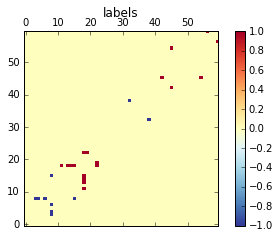

0.988497376442
(60, 60)
Limit: 0.988497376442


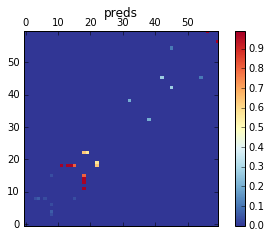

In [115]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_test_2d)+change_scale(preds_test_2d).T, change_scale(labels_test_2d)+change_scale(labels_test_2d).T, zoomIn_window, )

# Not Distance-Matched

In [111]:
# printMatrix(preds_noDM_2d, '', 1, 1, title='preds')
# printMatrix(labels_noDM_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


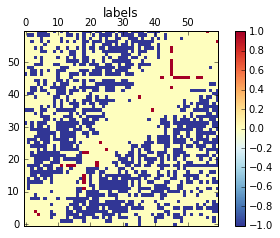

0.990303218365
(60, 60)
Limit: 0.990303218365


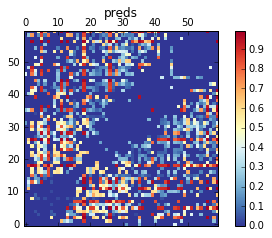

In [116]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_noDM_2d)+change_scale(preds_noDM_2d).T, change_scale(labels_noDM_2d)+change_scale(labels_noDM_2d).T, zoomIn_window, )